# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/test.p'
testing_file = 'traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape)


(34799, 32, 32, 3) (12630, 32, 32, 3) (4410, 32, 32, 3) (34799,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

n_train = len(train['labels'])

n_validation = len(valid['labels'])

n_test = len(test['labels'])

image_shape = X_train[0].shape

n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Number of validation examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

# utility functions
def plot_figures(figures, nrows = 1, ncols=1):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,image in zip(range(len(figures)), figures):
        if len(figures[ind].shape) == 3:
            axeslist.ravel()[ind].imshow(figures[ind])
        else:
            axeslist.ravel()[ind].imshow(figures[ind], cmap = 'gray')
        axeslist.ravel()[ind].set_axis_off()
    plt.show()

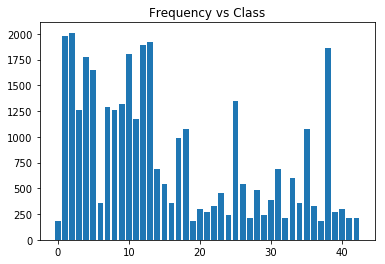

9  -  No passing


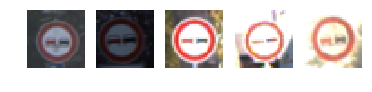

29  -  Bicycles crossing


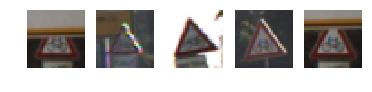

0  -  Speed limit (20km/h)


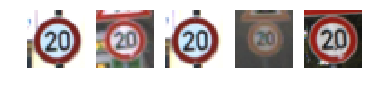

11  -  Right-of-way at the next intersection


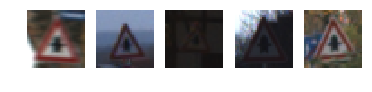

5  -  Speed limit (80km/h)


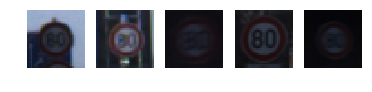

In [4]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
import csv

# Visualizations will be shown in the notebook.
%matplotlib inline

# Signs store the names of traffic sign class i at index i
signs = []
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        signs.append(row[1])
signs = signs[1:]

# labels is a dict from class to all the training examples of class i
labels = {}
for i in range(len(y_train)):
    if y_train[i] in labels:
        labels[y_train[i]].append(X_train[i])
    else:
        labels[y_train[i]] = [X_train[i]]

# Plot frequency vs class bar chart
freq = [len(labels[i]) for i in range(n_classes)]
plt.bar(range(n_classes), freq)
plt.title('Frequency vs Class')
plt.show()

# see images of 10 random examples from each class
for label in random.sample(labels.items(), 5):
    print(label[0], ' - ', signs[label[0]])
    figures = []
    for image in random.sample(label[1], 5):
        figures.append(image.squeeze())
    plot_figures(figures, 1, 5)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Some random training examples after preprocessing
(32, 32) 2


C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


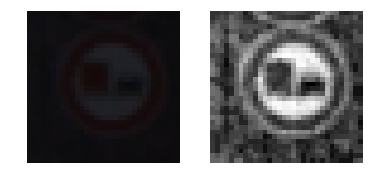

(32, 32) 2


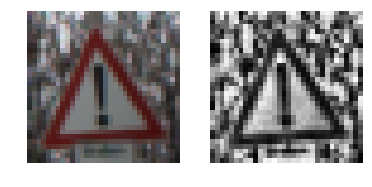

(32, 32) 2


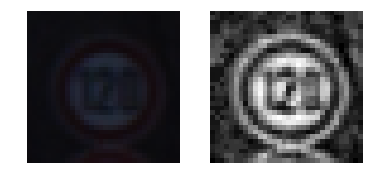

(32, 32) 2


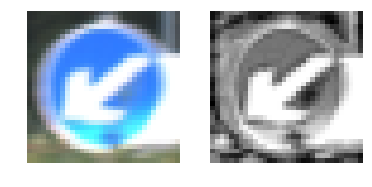

(32, 32) 2


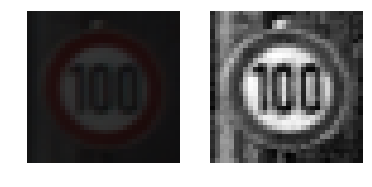

In [149]:
import skimage
from skimage import exposure

def prepocess_data(data):
    """
        data must be of type [?, X, Y, 3] - array of 3 channel images
    """
    ret = np.zeros([data.shape[0], data.shape[1], data.shape[2], 1])
    
    # Run an equalize_adaphist on the original 3 channel image and then convert into grayscale
    for i in range(data.shape[0]):
        ret[i] = skimage.color.rgb2gray(exposure.equalize_adapthist(data[i])).reshape([data.shape[1], data.shape[2], 1])
    
    return ret


print('Some random training examples after preprocessing')
random_sample = X_train[np.random.randint(0,X_train.shape[0],5)]
processed_imgs = prepocess_data(random_sample)
for img, new_img in zip(random_sample, processed_imgs):
    plot_figures([img, new_img.reshape([32,32])], 1, 2)


In [7]:
X_train = prepocess_data(X_train)
X_valid = prepocess_data(X_valid)

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Random images generated by adjusting gamma


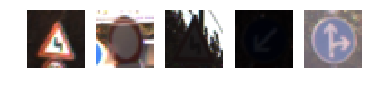

Random images generated by applying a perspective transform


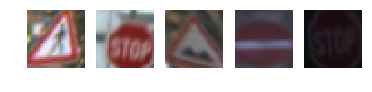

Random images generated by applying rotation transform


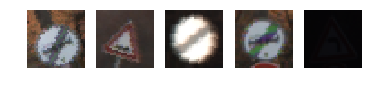

Random images generated by adding guassian noise


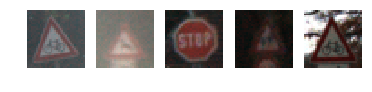

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [11]:
## Generate more dataset using keras and opencv
from keras.preprocessing.image import ImageDataGenerator
import cv2

# generate images using datagenerator object. The resultant class will have atleast threshold number of images
def generate_data(datagen, threshold):
    new_data, y = None, None
    for i in range(n_classes):
        labels[i] = np.array(labels[i])
        if(labels[i].shape[0] < threshold):
            j = 0
            for batch in datagen.flow(np.array(labels[i]), batch_size=128):
                j += batch.shape[0]
                if j > (threshold -  labels[i].shape[0]):
                    break
                if new_data is not None:
                    new_data = np.concatenate([new_data, batch])
                else:
                    new_data = batch
                if y is not None:
                    y = np.concatenate([y, batch.shape[0]*[i]])
                else:
                    y = batch.shape[0]*[i]
    
    return (new_data, y)

# Returns an image with random gamma variation
def adjust_gamma(img):
    gamma = random.random() * 2.5 + 0.1
    img = cv2.pow(img, gamma)
    return img

# Returns an image with random perspective transformation
def perspTransform(img):
    width = img.shape[0]/4
    pts1 = np.float32([[random.randint(0,width),random.randint(0,width)],
                                   [random.randint(3*width,4*width),random.randint(0,width)],
                                   [random.randint(0,width),random.randint(3*width,4*width)],
                                   [random.randint(3*width,4*width),random.randint(3*width,4*width)]])
    pts2 = np.float32([[0,0],[4*width,0],[0,4*width],[4*width,4*width]])
    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img, M, (32,32))
    return dst

# Returns an image after adding guassian noise
def gaussian_noise(img):
    dst = np.zeros(img.shape)
    std = 0.025
    cv2.randn(dst, 0., std)
    x = img + dst
    x[x > 1.0] = 1.0
    x[x < 0.0] = 0.0
    return x

# generic fn generating images till threshold using the func 
def generate_data2(func, th):
    new_data, y = None, None
    batch_size = 500
    for i in range(n_classes):
        labels[i] = np.array(labels[i])
        if(labels[i].shape[0] < th):
            j = 0
            batch = np.zeros([batch_size, 32,32,3])
            for j in range(batch_size):
                batch[j] = func(labels[i][random.randint(0, labels[i].shape[0] - 1)])
                
            j += batch.shape[0]
            if new_data is not None:
                new_data = np.concatenate([new_data, batch])
            else:
                new_data = batch
            if y is not None:
                y = np.concatenate([y, batch.shape[0]*[i]])
            else:
                y = batch.shape[0]*[i]
    
    return (new_data, y)

from functools import partial

new_data = generate_data2(adjust_gamma, 3000)
print('Random images generated by adjusting gamma')
plot_figures(new_data[0][np.random.randint(0, new_data[0].shape[0], 5)], 1, 5)
plt.show()

new_data2 = generate_data2(perspTransform, 1000)
print('Random images generated by applying a perspective transform')
plot_figures(new_data2[0][np.random.randint(0, new_data2[0].shape[0], 5)], 1, 5)
plt.show()

new_data3 = generate_data(ImageDataGenerator(rotation_range = 30), 500)
print('Random images generated by applying rotation transform')
plot_figures(new_data3[0][np.random.randint(0, new_data3[0].shape[0], 5)], 1, 5)
plt.show()

new_data4 = generate_data2(gaussian_noise, 1000)
print('Random images generated by adding guassian noise')
plot_figures(new_data4[0][np.random.randint(0, new_data4[0].shape[0], 5)], 1, 5)
plt.show()

X_train = np.concatenate([prepocess_data(new_data[0]), X_train])
y_train = np.concatenate([new_data[1], y_train])

X_train = np.concatenate([prepocess_data(new_data2[0]), X_train])
y_train = np.concatenate([new_data2[1], y_train])

X_train = np.concatenate([prepocess_data(new_data3[0]), X_train])
y_train = np.concatenate([new_data3[1], y_train])

X_train = np.concatenate([prepocess_data(new_data4[0]), X_train])
y_train = np.concatenate([new_data4[1], y_train])


Training set after all the data augmentation (86695, 32, 32, 1)


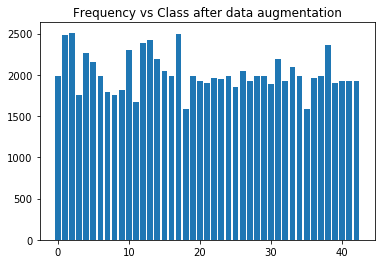

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
print("Training set after all the data augmentation", X_train.shape)

labels2 = {}
for i in range(len(y_train)):
    if y_train[i] in labels2:
        labels2[y_train[i]].append(X_train[i])
    else:
        labels2[y_train[i]] = [X_train[i]]
        
# Plot frequency vs class bar chart after data augmentation
freq = [len(labels2[i]) for i in range(n_classes)]
plt.bar(range(n_classes), freq)
plt.title('Frequency vs Class after data augmentation')
plt.show()

### Model Architecture

In [13]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [14]:
from tensorflow.contrib.layers import flatten
l1 = None
l2 = None
l3 = None
l4 = None
def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    global l1,l2,l3,l4
    
#     normalize the data between -1 to 1
    x = tf.divide(tf.subtract(x, tf.constant(0.5)),tf.constant(0.5))
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    weights = tf.Variable(tf.truncated_normal([5,5,1,20], mu, sigma))
    bias = tf.truncated_normal([20], mu, sigma)
    l1 = conv2d(x, weights, bias)
    
    # Pooling. Input = 28x28x20. Output = 14x14x20.
    pool = tf.nn.max_pool(
        l1,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x40.
    weights = tf.Variable(tf.truncated_normal([5,5,20,40], mu, sigma))
    bias = tf.truncated_normal([40], mu, sigma)
    l2 = conv2d(pool, weights, bias)
    
    # Pooling. Input = 10x10x40. Output = 5x5x40.
    pool = tf.nn.max_pool(
        l2,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID')
    
    # Add a dropout to avoid over-fitting
    l2 = tf.nn.dropout(l2, keep_prob)
    
    # Flatten. Input = 5x5x40. Output = 1000.
    flatt = flatten(pool)
    
    # Layer 3: Fully Connected. Input = 1000. Output = 250.
    weights = tf.Variable(tf.truncated_normal( [1000,250], mu, sigma))
    bias = tf.truncated_normal([250], mu, sigma)
    l3 = tf.add(tf.matmul(flatt, weights), bias)
    
    # Add a dropout to avoid over-fitting
    l3 = tf.nn.dropout(l3, keep_prob)
    
    # Layer 4: Fully Connected. Input = 250. Output = 125.
    weights = tf.Variable(tf.truncated_normal([250,125], mu, sigma))
    bias = tf.truncated_normal([125], mu, sigma)
    l4 = tf.add(tf.matmul(l3, weights), bias)
    
    # Add a dropout to avoid over-fitting
    l4 = tf.nn.dropout(l4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 125. Output = 84
    weights = tf.Variable(tf.truncated_normal([125,84], mu, sigma))
    bias = tf.truncated_normal([84], mu, sigma)
    l5 = tf.add(tf.matmul(l4, weights), bias)
    
    l5 = tf.nn.dropout(l5, keep_prob)
    
    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    weights = tf.Variable(tf.truncated_normal([84, 43], mu, sigma))
    bias = tf.truncated_normal([43], mu, sigma)
    logits = tf.add(tf.matmul(l5, weights), bias)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [16]:
rate = tf.placeholder_with_default(0.001, None)

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    num_examples = len(X_train)
    print("Training...", X_train.shape)
    print()
    for train_iter in range(2):
        print("Training iteration: ", train_iter)
        if train_iter == 0:
            sess.run(tf.global_variables_initializer())
        else:
             saver.restore(sess, './lenet')
                
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6, 
                                                        rate:0.001 if train_iter == 0 else 0.0001})

            validation_accuracy = evaluate(X_valid, y_valid)
            training_accuracy = evaluate(X_train, y_train)
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training... (86695, 32, 32, 1)

Training iteration:  0
EPOCH 1 ...
Training Accuracy = 0.910
Validation Accuracy = 0.909

EPOCH 2 ...
Training Accuracy = 0.951
Validation Accuracy = 0.935

EPOCH 3 ...
Training Accuracy = 0.965
Validation Accuracy = 0.944

EPOCH 4 ...
Training Accuracy = 0.973
Validation Accuracy = 0.949

EPOCH 5 ...
Training Accuracy = 0.977
Validation Accuracy = 0.944

EPOCH 6 ...
Training Accuracy = 0.978
Validation Accuracy = 0.949

EPOCH 7 ...
Training Accuracy = 0.984
Validation Accuracy = 0.946

EPOCH 8 ...
Training Accuracy = 0.985
Validation Accuracy = 0.951

EPOCH 9 ...
Training Accuracy = 0.983
Validation Accuracy = 0.954

EPOCH 10 ...
Training Accuracy = 0.987
Validation Accuracy = 0.955

Training iteration:  1
EPOCH 1 ...
Training Accuracy = 0.992
Validation Accuracy = 0.962

EPOCH 2 ...
Training Accuracy = 0.992
Validation Accuracy = 0.962

EPOCH 3 ...
Training Accuracy = 0.993
Validation Accuracy = 0.965

EPOCH 4 ...
Training Accuracy = 0.993
Validation A

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [130]:
### Load the images downloaded from web.

### Load the images downloaded from web.
from os import listdir
import matplotlib.image as mpimg
import scipy, csv
imgs = []
for file in sorted(listdir('pics')):
    image = mpimg.imread('pics/' + file)
    image = scipy.misc.imresize(image, (32,32,3))
    image = image / 255.0
    imgs.append(image)

### Analyze Performance And Emit Softmax Probabilites For all the web images

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Accuracy for the new images:0.666666686535




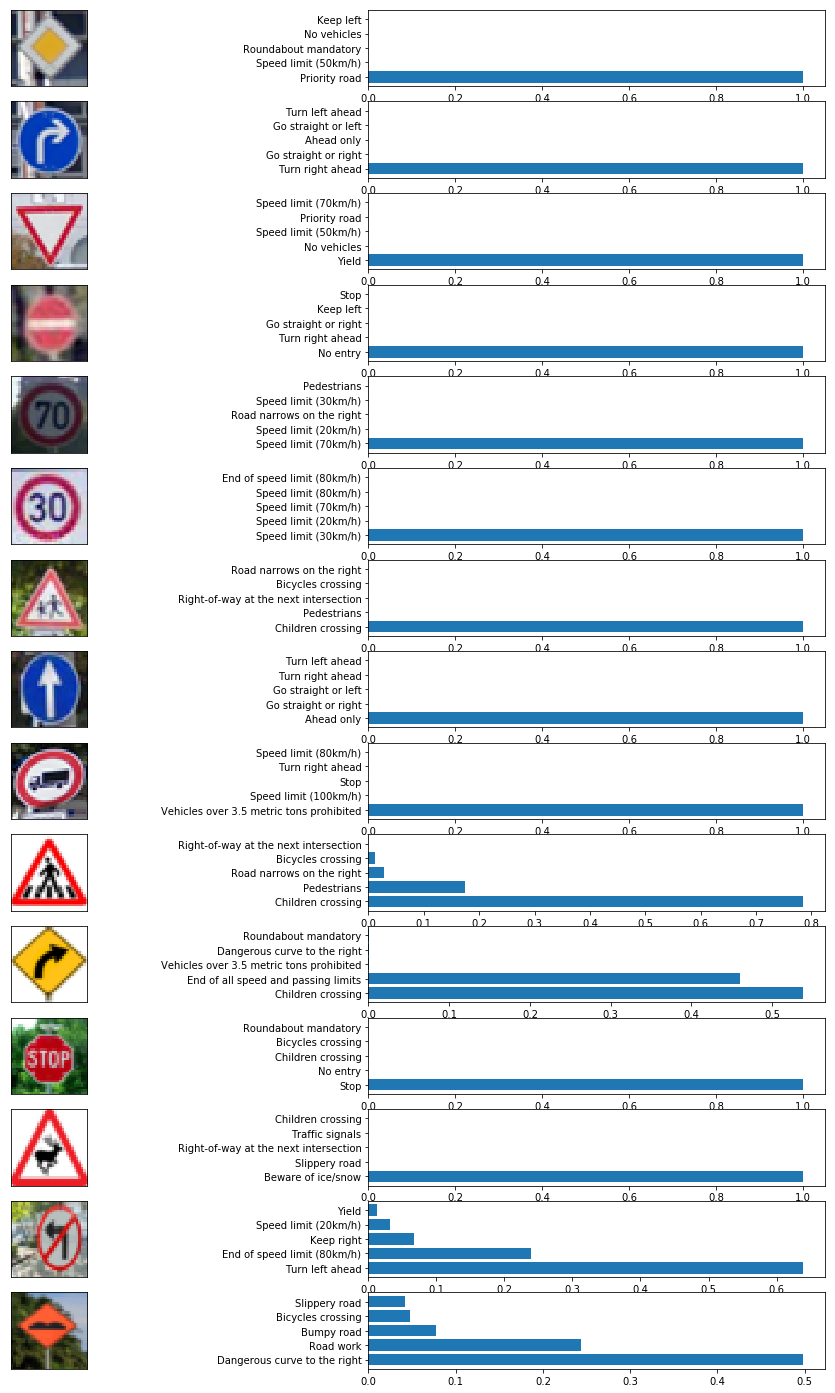

In [198]:
### Running the predictions here and use the model to output the prediction for each image.
import operator
# The corresponding classes for the new data set
x_new = prepocess_data(np.array(imgs))
y_new  = np.array([12, 33, 13, 17, 4, 1, 28, 35, 16,27, 20,14,31,37,22])
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    res = sess.run(logits, feed_dict = {x: x_new, keep_prob: 1.0})
    arr = tf.placeholder(tf.float32, (None))
    topk = tf.nn.top_k(tf.nn.softmax(arr), k = 5)
    
    cp = sess.run(correct_prediction, feed_dict = {x: x_new, keep_prob: 1.0, y: y_new})
    
    plt.figure(figsize=(18,25))
    for i in range(len(cp)):
        topkvalues = sess.run(topk, feed_dict={arr: res[i]})
        plt.subplot(len(cp),2,(i+1)*2 -1)
        plt.imshow(imgs[i])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

        plt.subplot(len(cp),2,(i+1)*2)
        plt.barh(range(5), topkvalues.values, align='center')
        plt.yticks(range(5) ,[signs[idx] for idx in topkvalues.indices])
    
    print("Accuracy for the new images:", end = '')
    print(evaluate(x_new, y_new))
    print()
    print()


### Analyze Performance And Emit Softmax Probabilites For all the web images

In [197]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(prepocess_data(X_test), y_test)
    res = sess.run(logits, feed_dict = {x: data, keep_prob: 1.0})
    arr = tf.placeholder(tf.float32, (None))
    topk = tf.nn.top_k(tf.nn.softmax(arr), k = 5)
    print("Test Accuracy = {:.3f}".format(validation_accuracy))

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Test Accuracy = 0.964


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [200]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

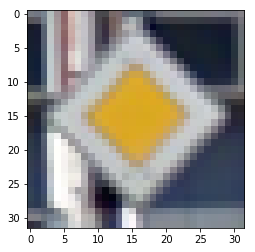

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


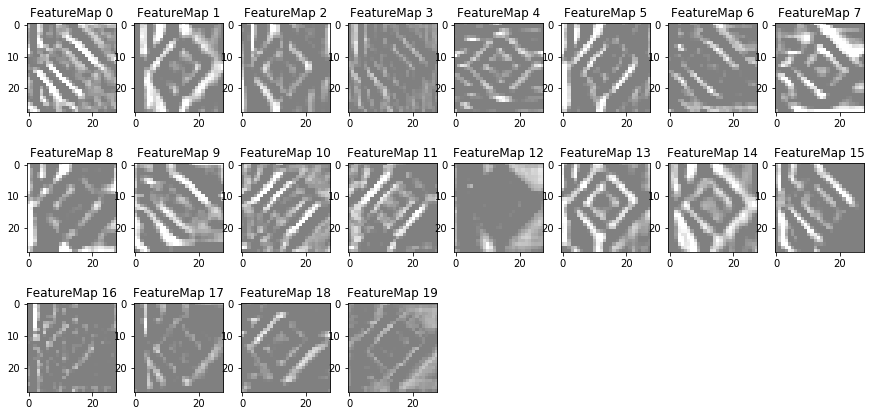

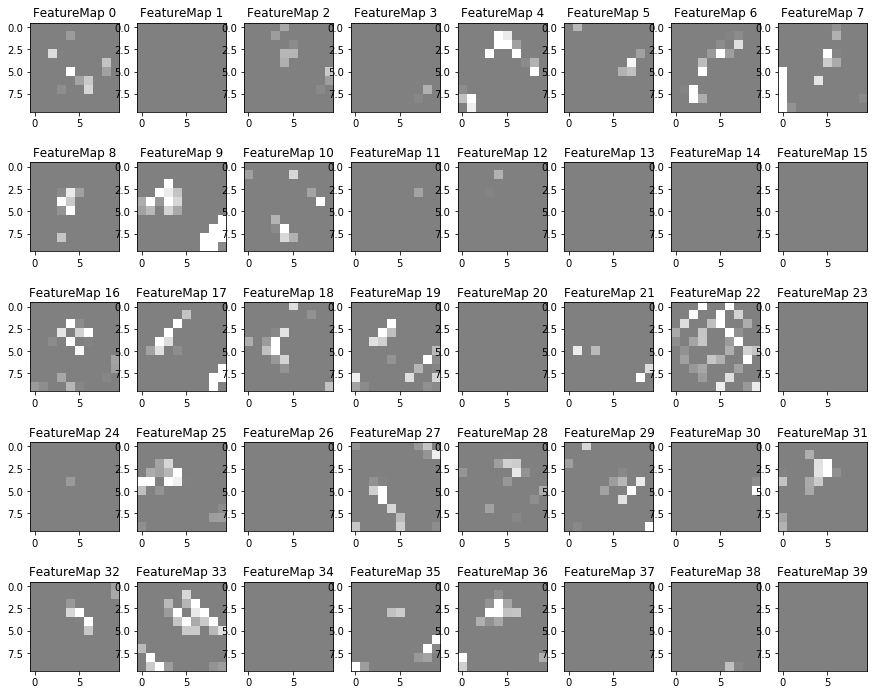

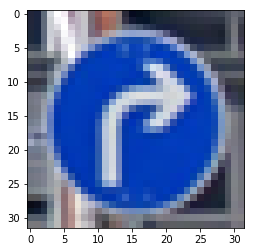

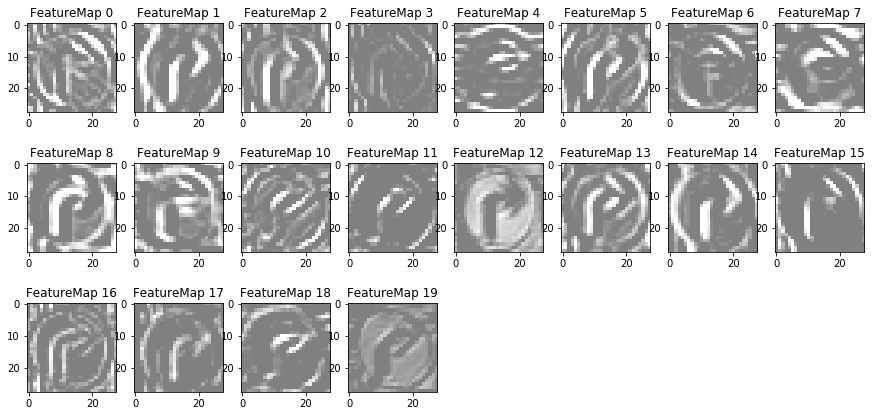

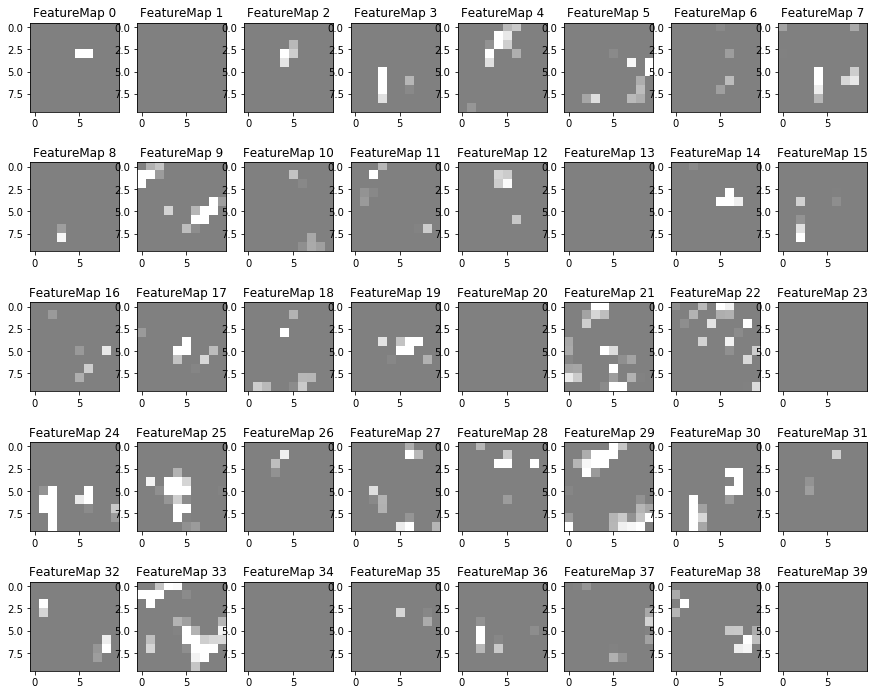

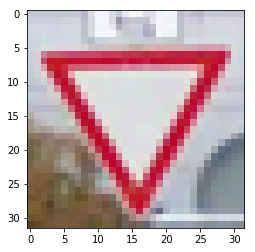

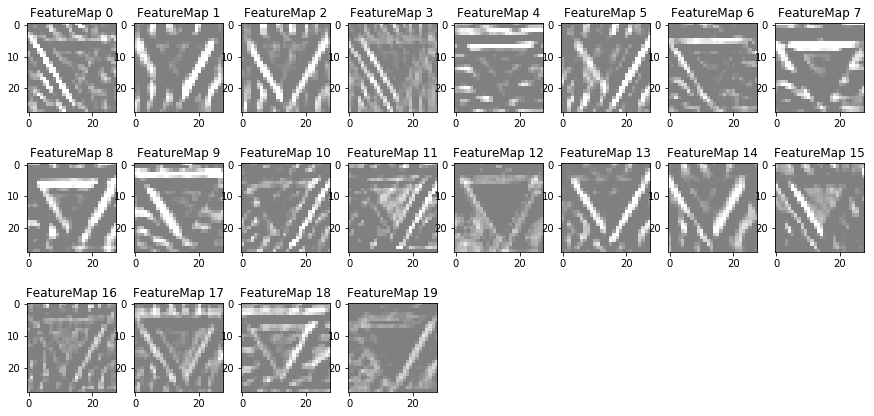

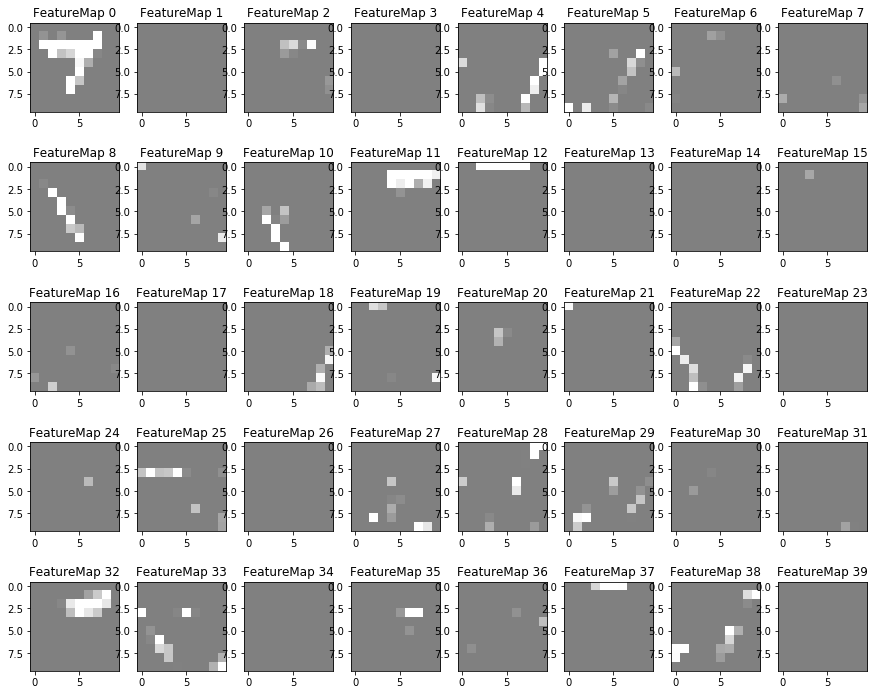

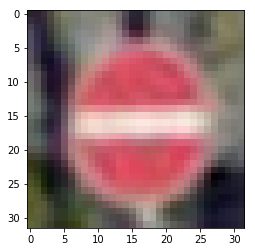

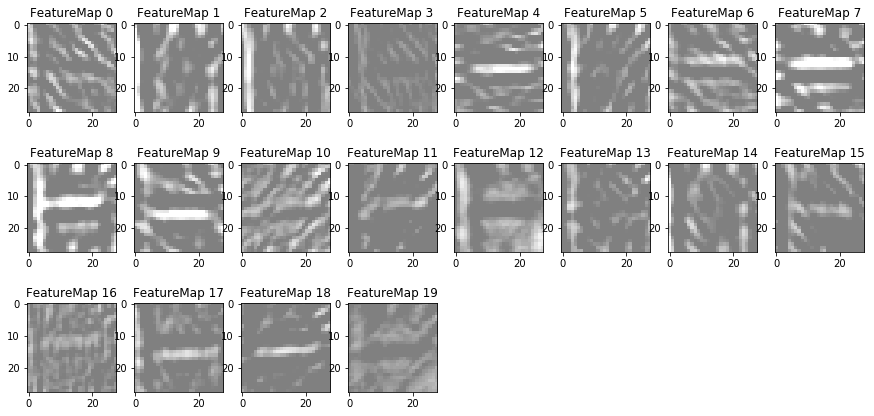

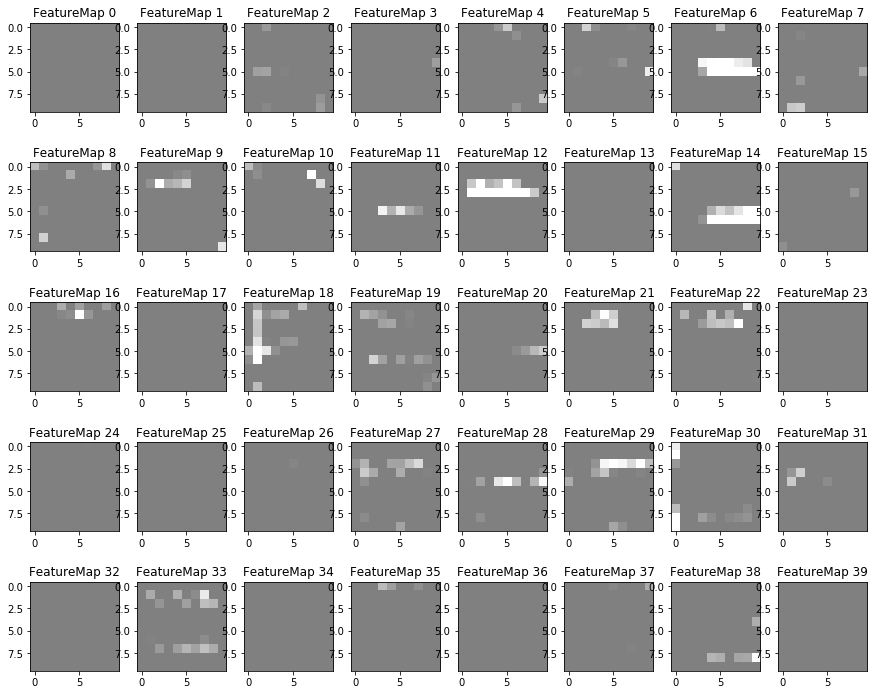

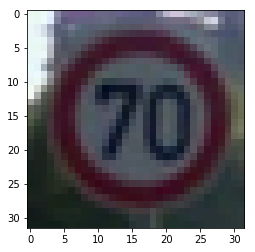

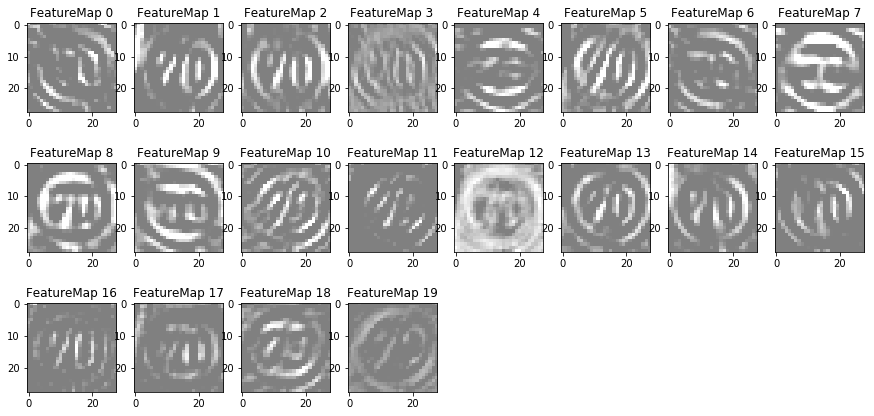

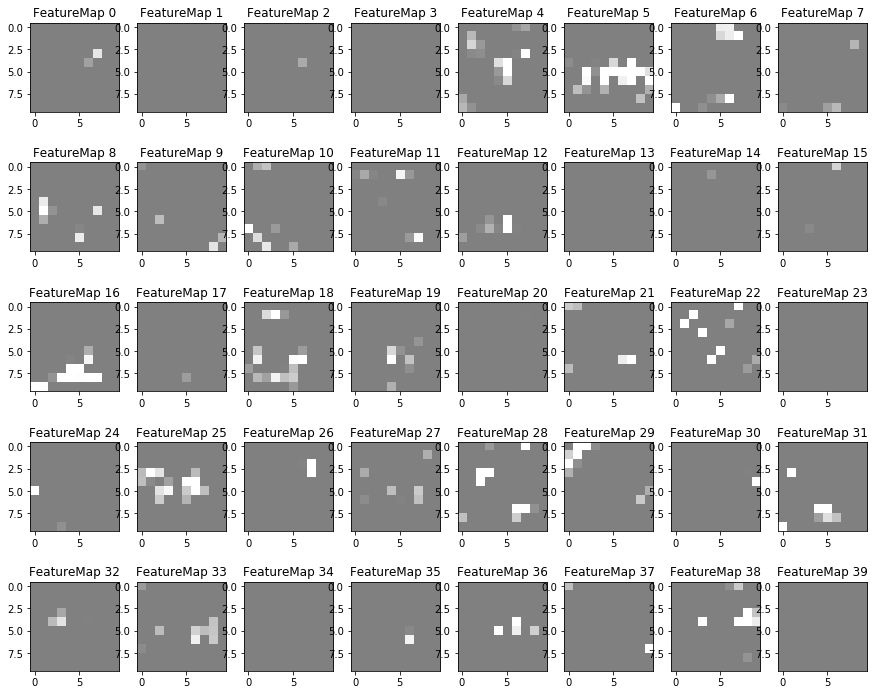

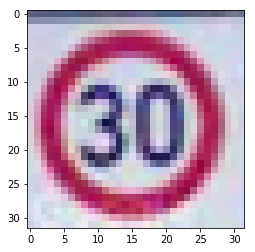

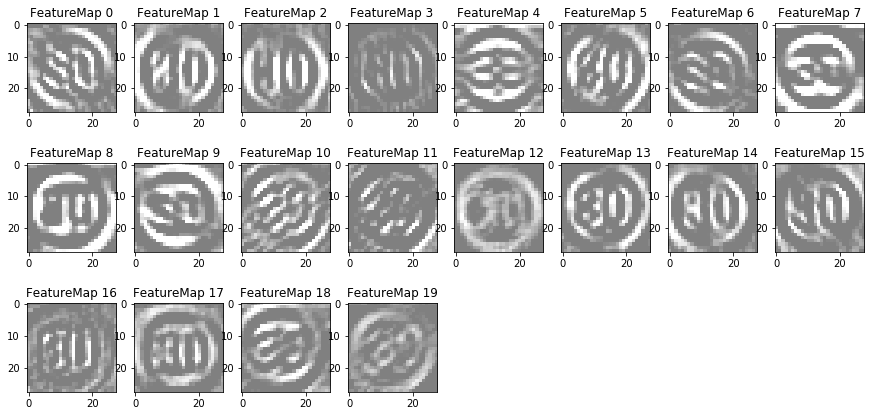

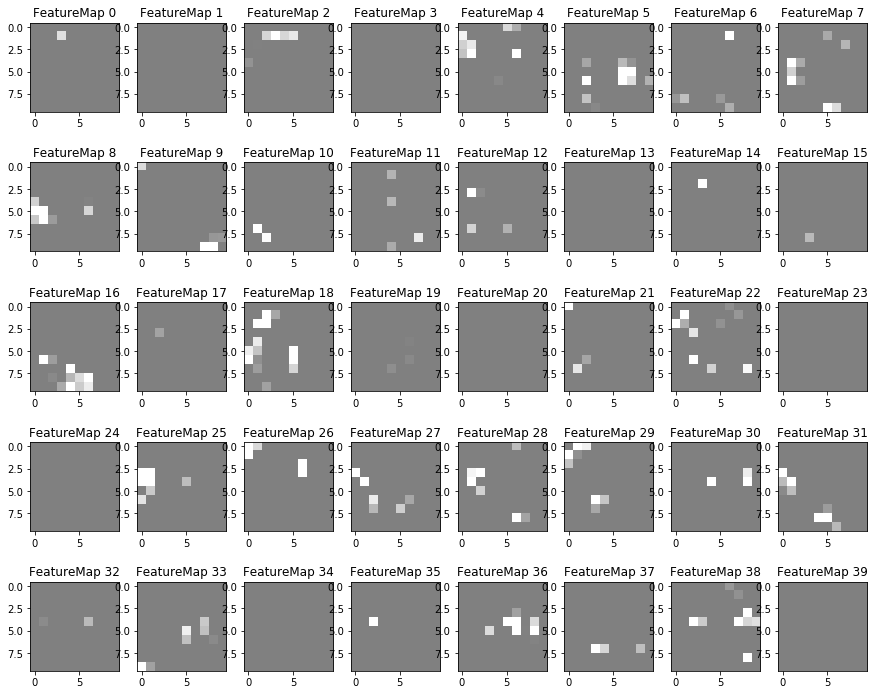

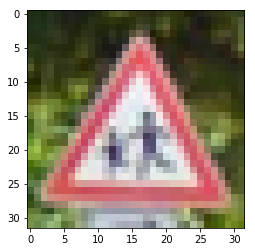

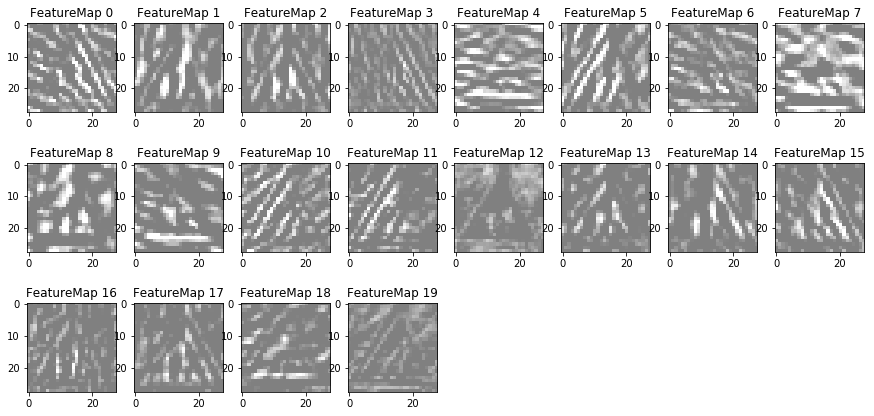

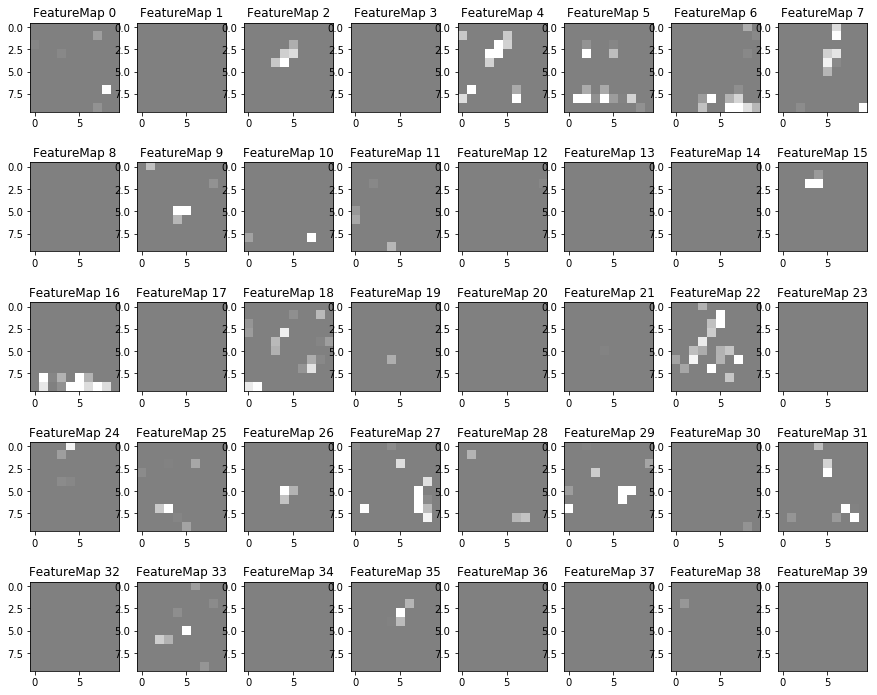

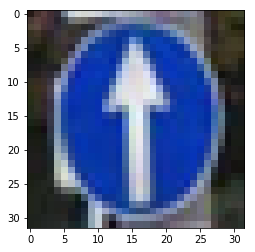

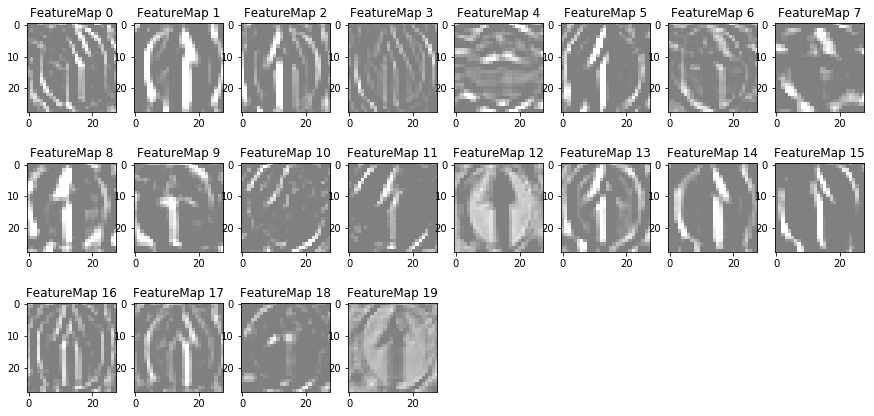

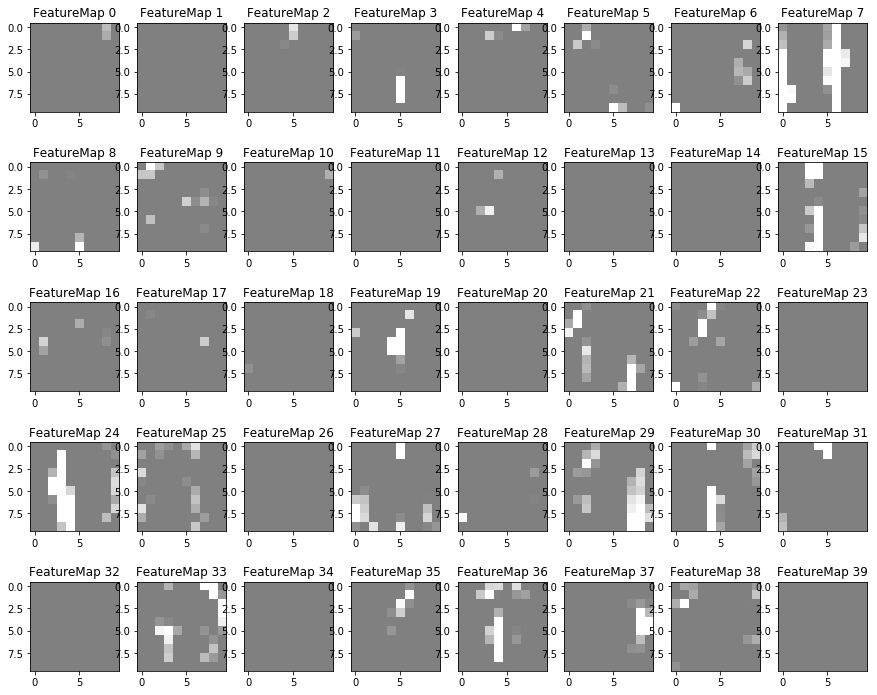

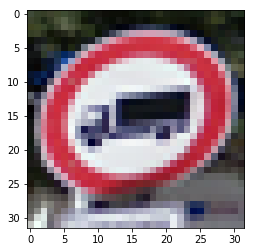

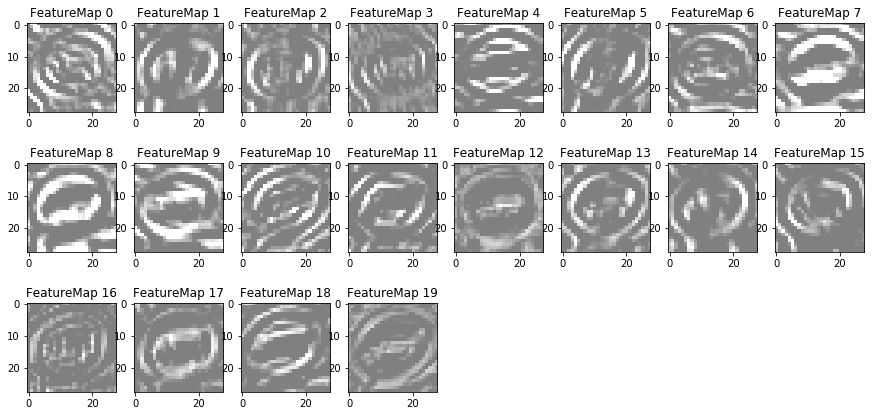

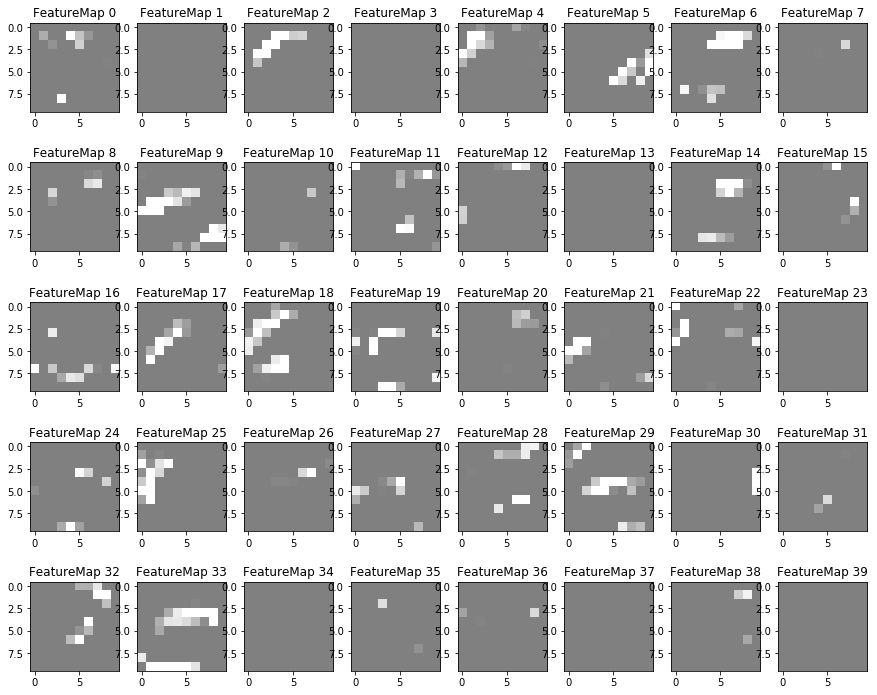

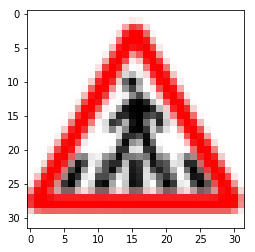

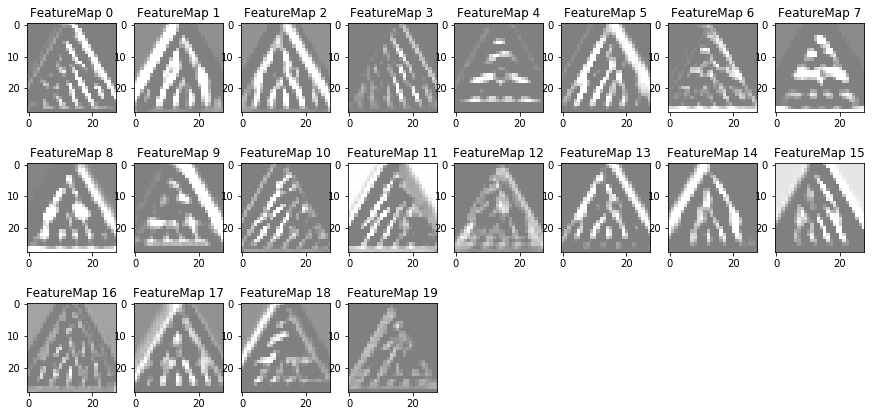

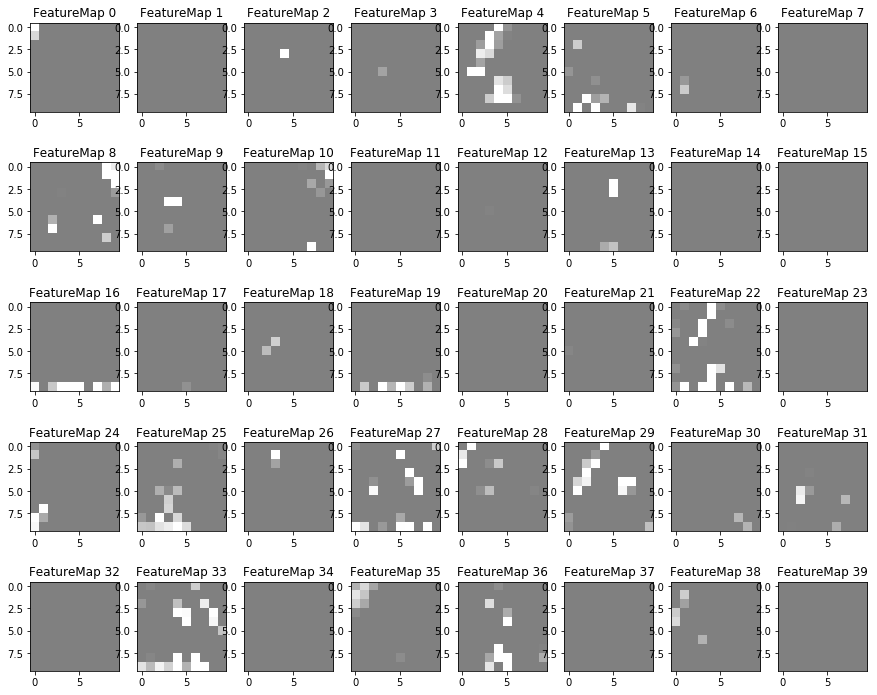

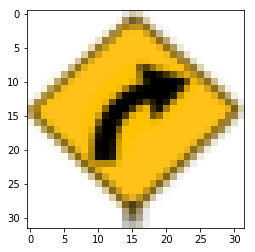

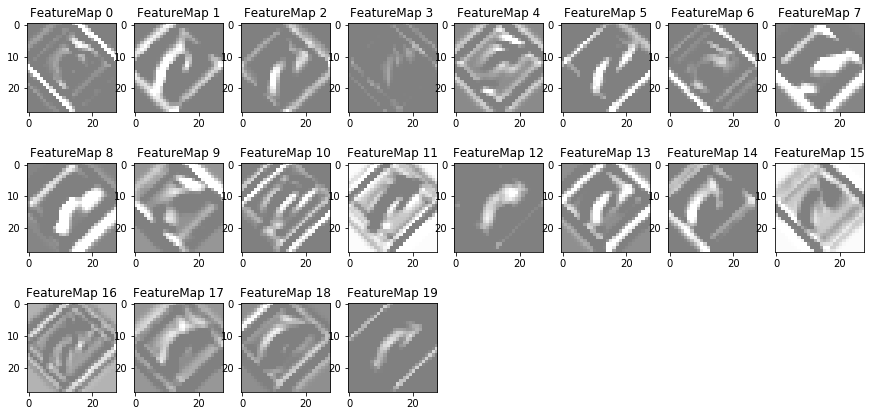

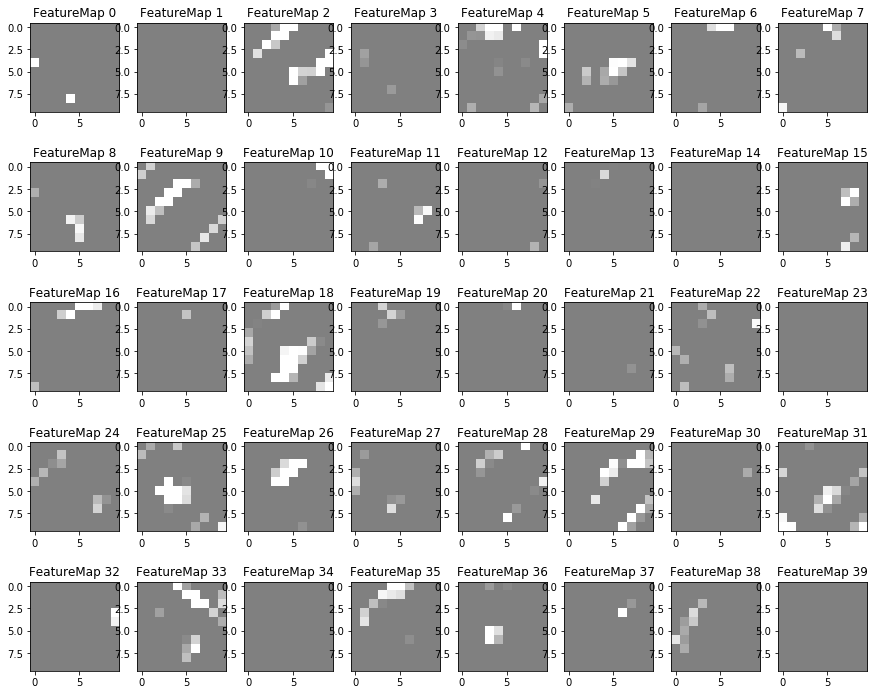

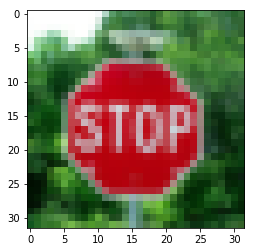

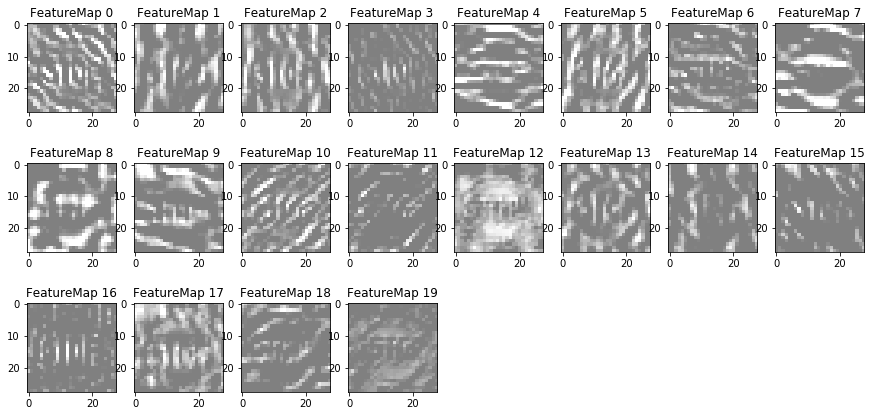

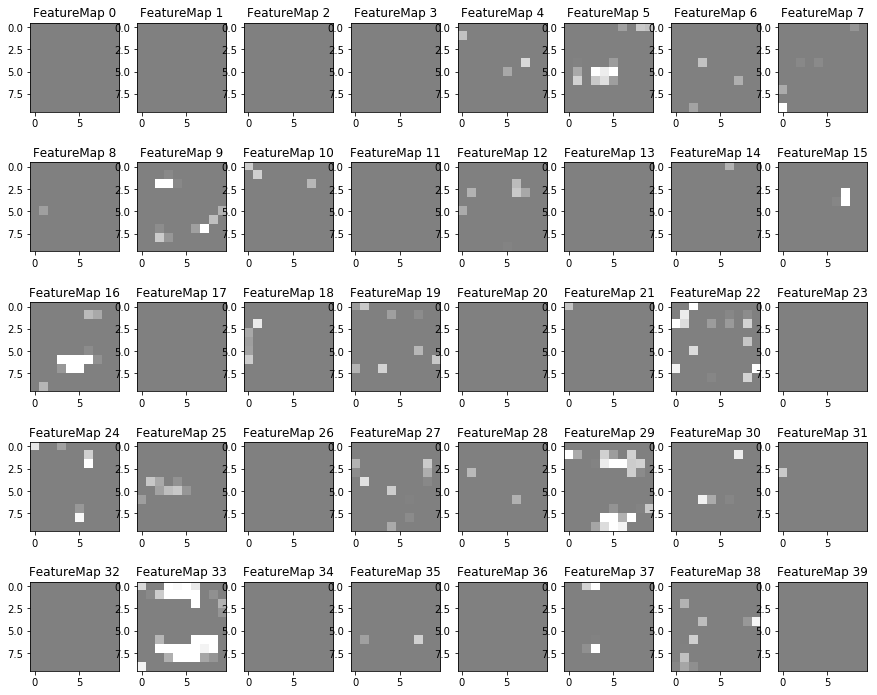

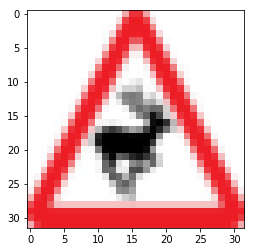

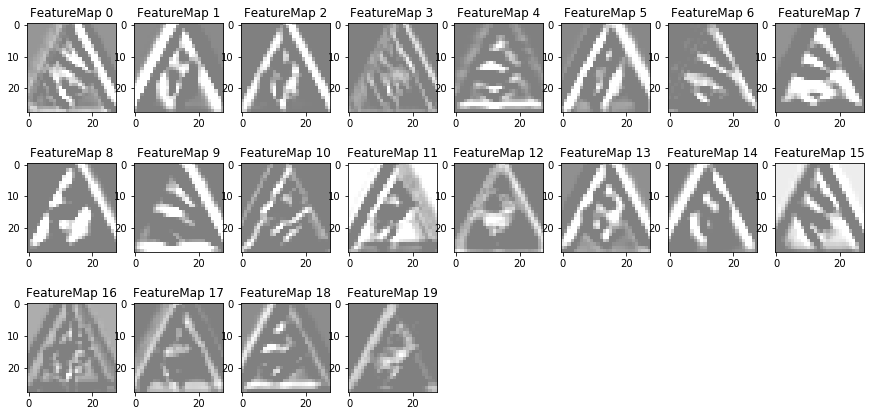

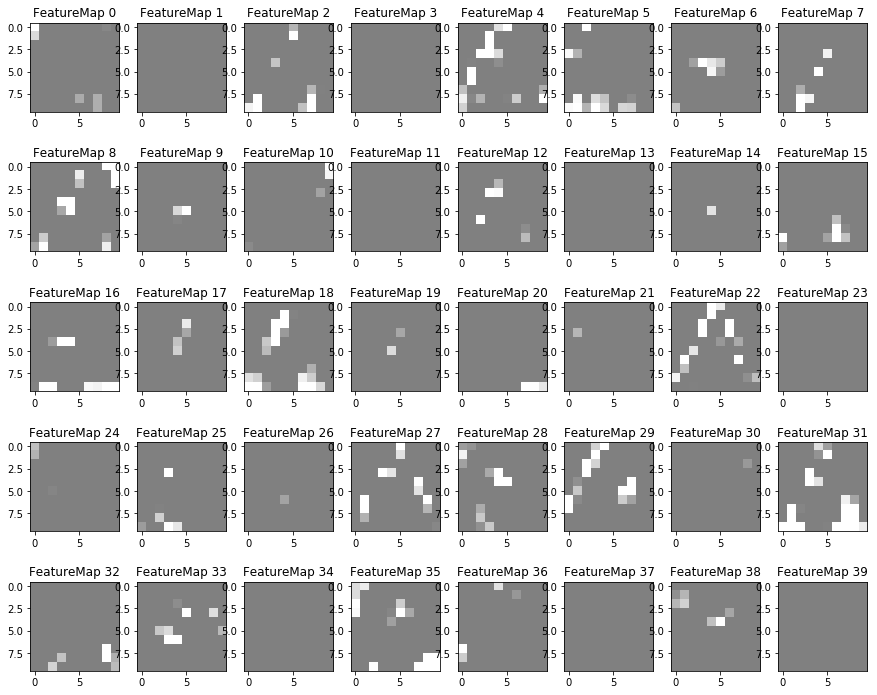

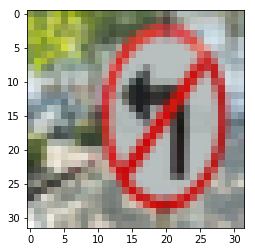

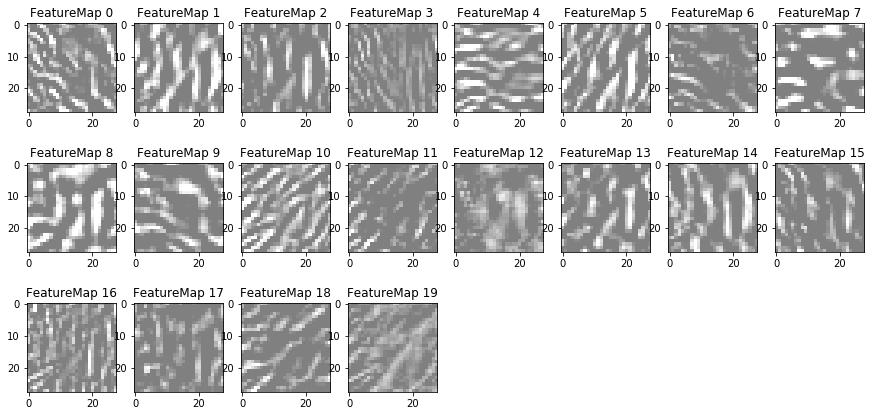

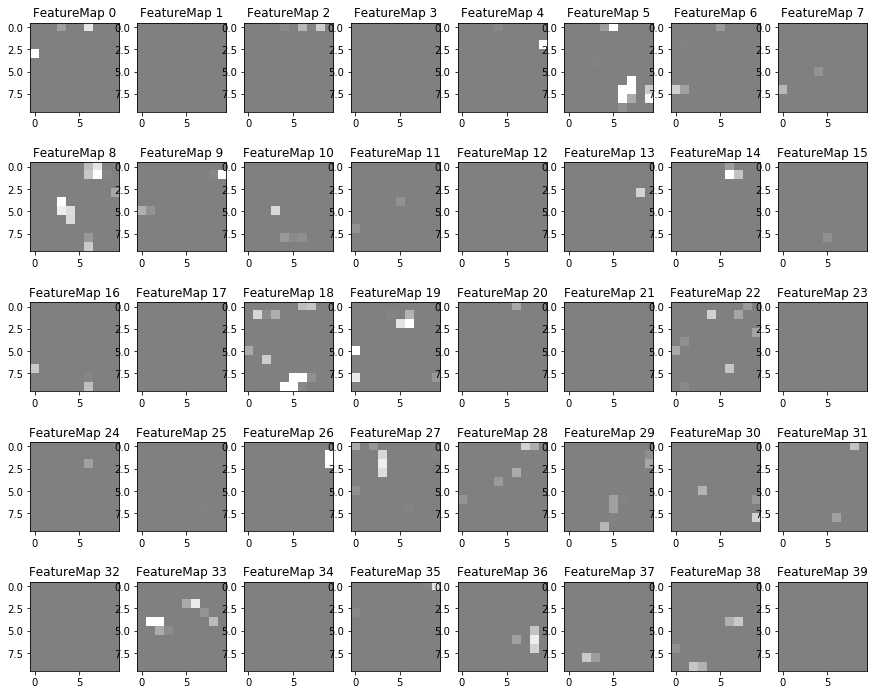

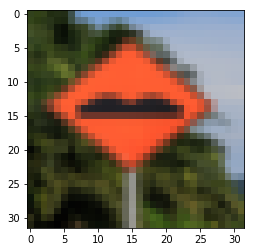

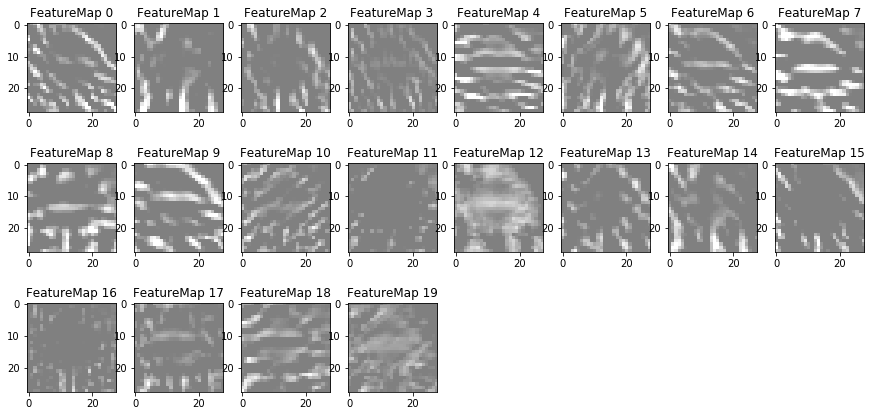

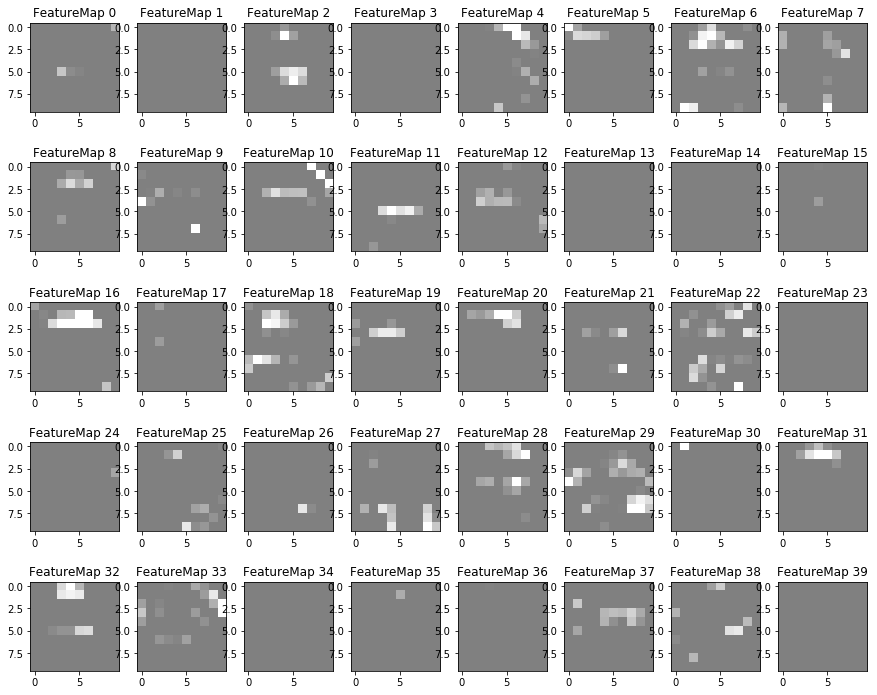

In [201]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    for i in range(len(imgs)):
        plt.imshow(imgs[i])
        plt.show()
        outputFeatureMap(prepocess_data(np.array(imgs[i:])), l1)
        outputFeatureMap(prepocess_data(np.array(imgs[i:])), l2)